<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [133]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [134]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [136]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


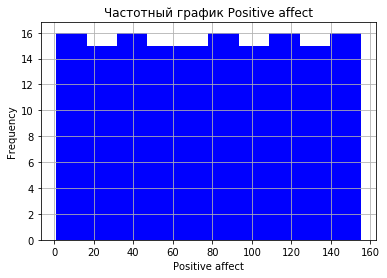

In [137]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='b')

plt.xlabel('Positive affect')
plt.ylabel('Frequency')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

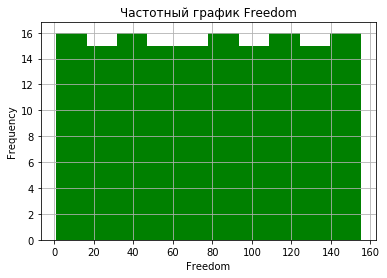

In [138]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

Распределение Freedom и Positive affect близко к равномерному.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [139]:
freedom = df['Freedom'].dropna()
print('Колонка Freedom:')
print('- математическое ожидание: ', statistics.mean(freedom)) 
print('- медиана:', statistics.median(freedom))
# print('- мода: ', statistics.mode(freedom)) # returns StatiscitsErroe: no uniquie mode; found 156 equally common values
print('- мода: ', 'отсутствует')
print('- стандартное отклонение:', statistics.pstdev(freedom))
print('- дисперсия:', statistics.pvariance(freedom))
print('- минимум:', freedom.min())
print('- максимум:', freedom.max())
print('- размах:', freedom.max()-freedom.min())

Колонка Freedom:
- математическое ожидание:  78.0
- медиана: 78.0
- мода:  отсутствует
- стандартное отклонение: 44.74371464239419
- дисперсия: 2002.0
- минимум: 1.0
- максимум: 155.0
- размах: 154.0


Почему нельзя найти моду?
- Моду для Freedom не возможно найти, т.к. при равномерном распределении частоты каждого возможного значения (примерно) одинаковы - отсутствует наиболее часто встречающееся значение.

Явных выбраслов в столбце Freedom не наблюдается.


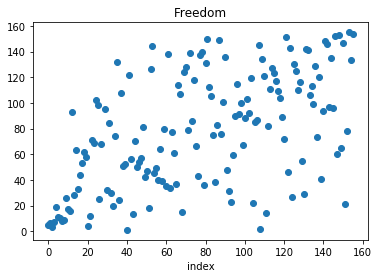

In [140]:
plt.title('Freedom')
plt.xlabel('index')
plt.scatter(df.index, df['Freedom'])
print('Явных выбраслов в столбце Freedom не наблюдается.')

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6965670458090685
"Положительный" коэффициент Пирсона - при увеличении одной величины, вторая тоже увеличивается.


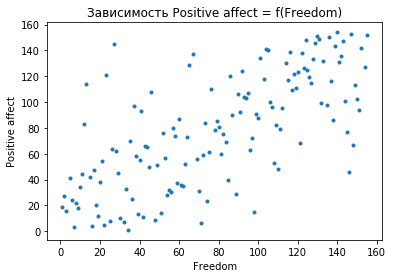

In [141]:
df1 = df.dropna()
freedom = df1['Freedom']
positive_affect = df1['Positive affect']
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Зависимость Positive affect = f(Freedom)')
plt.scatter(freedom, positive_affect, marker = '.')
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона:', corr)
print('"Положительный" коэффициент Пирсона - при увеличении одной величины, вторая тоже увеличивается.')

Нормализовать данные колонки Freedom (централизация + масштабирование)

min =  -0.9999999999999999 ; max =  1.0000000000000002


Text(0, 0.5, 'Freedom (norm.)')

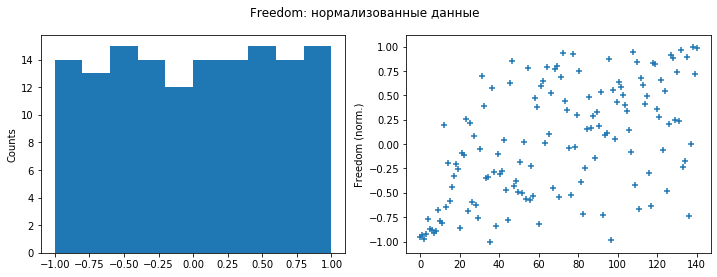

In [76]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
normallized_freedom = min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1))
print('min = ', normallized_freedom.min(), '; max = ', normallized_freedom.max())


# plt.scatter(np.linspace(0, len(normallized_freedom), len(normallized_freedom)), normallized_freedom, marker='+')
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
axs[0].hist(normallized_freedom)
axs[1].scatter(np.linspace(0, len(normallized_freedom), len(normallized_freedom)), normallized_freedom, marker='+')
fig.suptitle('Freedom: нормализованные данные')
axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Freedom (norm.)')

Построить матрицу корреляций для всех колонок таблицы

Text(0.5, 1, 'Матрица корреляций')

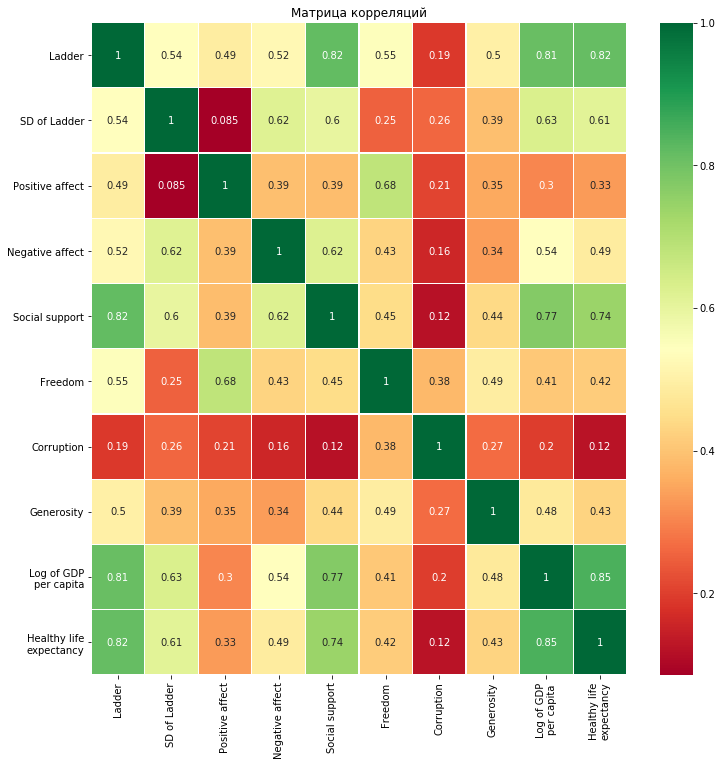

In [80]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Матрица корреляций')

Загрузить таблицу цен на авокадо: 

In [146]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Text(0.5, 1.0, 'Средняя цена - близко к нормарному распределению')

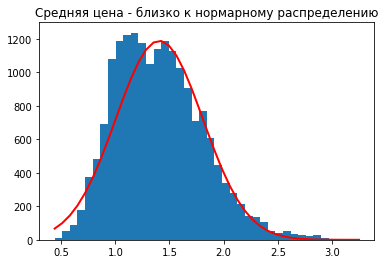

In [147]:
average_price = df['AveragePrice']
count, bins, ignored = plt.hist(average_price, 40)
mu = statistics.mean(average_price)
sigma = statistics.pstdev(average_price)
plt.plot(bins, 1200/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.title('Средняя цена - близко к нормарному распределению')

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [148]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


-0.2083170484878848

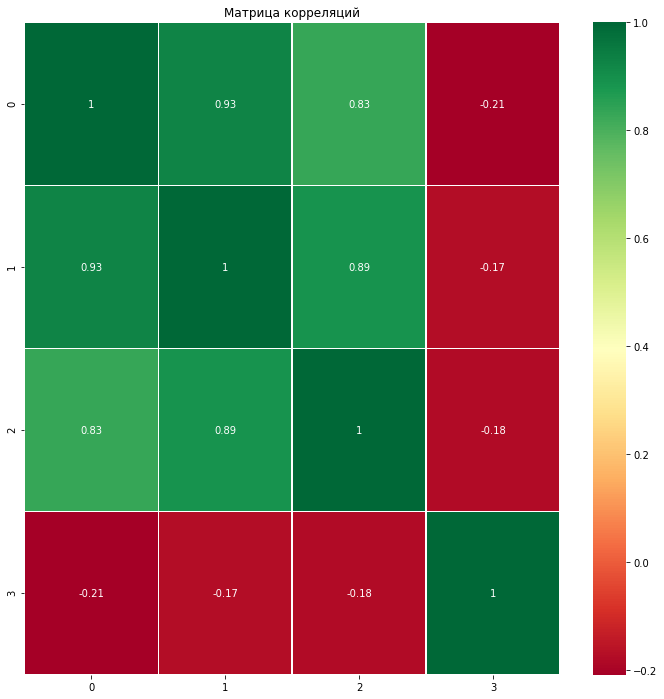

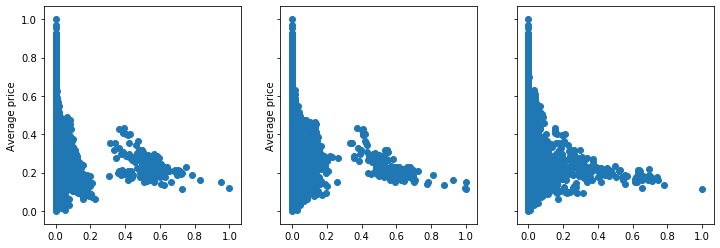

In [171]:
# нормализация значений
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

data = pd.DataFrame(min_max_scaler.fit_transform(df[['4046', '4225', '4770', 'AveragePrice']]))
# data = df[['4046', '4225', '4770', 'AveragePrice']]


sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Матрица корреляций')

code4046 = data[0]
code4225 = data[1]
code4770 = data[2]
average_price = data[3]

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].scatter(code4046, average_price)
axs[1].scatter(code4225, average_price)
axs[2].scatter(code4770, average_price)

# fig.suptitle('Freedom: нормализованные данные')
axs[0].set_ylabel('Average price')
axs[1].set_ylabel('Average price')
axs[1].set_ylabel('Average price')

corr, p_value = pearsonr(code4046, average_price)
corr

In [183]:
for column in data.columns:
    print('Корреляция Spearman: ', sts.spearmanr(data[column], data[3])[0])
    print('Корреляция Kendall: ', sts.kendalltau(data[column], data[3])[0])


Корреляция Spearman:  -0.5961701841279068
Корреляция Kendall:  -0.41677702878694456
Корреляция Spearman:  -0.5137317111506706
Корреляция Kendall:  -0.34358079841446904
Корреляция Spearman:  -0.5328254290377853
Корреляция Kendall:  -0.37450739985891623
Корреляция Spearman:  0.9999999999999998
Корреляция Kendall:  1.0


Корреляции между общим количеством авокадо разных кодов и средней ценой не наблюдается (слабая):
- коэффициенты Писона -0.21...-0.17
Знак "-" всех ко